In [10]:
#HTML Templates JINJA
import pandas as pd
import pdfkit
from jinja2 import Template

data = pd.read_csv("http://digo.ee/data-102743.utf.csv", delimiter=";")
html = '''<html>
    <head>
        <title>Herald Mos Symbols</title>
        <meta charset="utf-8"/>
    </head>
<body>'''
for i, item in data.iterrows():
    html += Template(open('heraldic.item.html').read()).render(data=item)
html += '</body></html>'

config = pdfkit.configuration(wkhtmltopdf='C:/Program FIles/wkhtmltopdf/bin/wkhtmltopdf.exe')
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, 'heraldic.pdf',
                    configuration=config, options=options)

FileNotFoundError: [Errno 2] No such file or directory: 'heraldic.item.html'

In [14]:
#Циклы и условия в шаблонах
import pandas as pd
import pdfkit
from jinja2 import Template

data = pd.read_csv("http://digo.ee/data-102743.utf.csv", delimiter=";")
html = Template(open('heraldic.html', encoding="utf-8").read()).render(data=data.iterrows())
config = pdfkit.configuration(wkhtmltopdf="C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe")
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, 'heraldic.pdf',
                   configuration=config, options=options)

FileNotFoundError: [Errno 2] No such file or directory: 'heraldic.html'

In [13]:
#Вывод таблих и изображений
import requests
import json
import pandas as pd
import binascii
import pdfkit
from jinja2 import Template

with open('libraries.png', 'rb') as file:
    img = 'data:image/png;base64,' + binascii.b2a_base64(file.read(), newline=False).decode("UTF-8")
r = requests.get("https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json")
data = pd.DataFrame(json.loads(r.content),
                   columns=["NumOfVisitors", "CommonName"]).fillna(value=0)
data.columns = ["Посетители", "Название"]
data.set_index("Название", inplace=True)
html_template = '''<html>
<head>
    <title>Итоговая таблица по библиотекам</title>
    <meta charset="utf-8"/>
</head>
<body>
    <h1>Распределение посетителей</h1>
    <img src="{{data.image}}" alt="Распределение посетителей">
    <h2>Данные по библиотекам</h2>
    {{data.table}}
</body>
</html>'''

html = Template(html_template).render(data = {
    'image': img,
    'table': data.to_html()
})

config = pdfkit.configuration(wkhtmltopdf='C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe')
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, 'libraries.total.pdf',
                  configuration=config, options = options)

OSError: No wkhtmltopdf executable found: "C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe"
If this file exists please check that this process can read it. Otherwise please install wkhtmltopdf - https://github.com/JazzCore/python-pdfkit/wiki/Installing-wkhtmltopdf

Тайцзицюань 1


AttributeError: module 'pandas' has no attribute 'set_options'

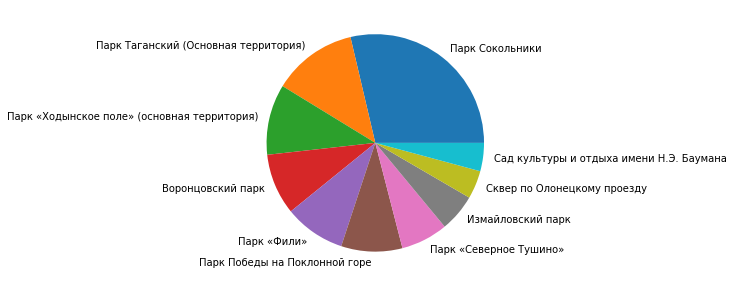

In [15]:
#Многостраничный ответ
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import binascii
import pdfkit

r = requests.get(
    'https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json')

data = pd.DataFrame(json.loads(r.content),
                    columns=['CourseName', 'CoursesTimetable', 'NameOfPark'])
data['NameOfPark'] = data['NameOfPark'].apply(lambda x: x['value'])
data.columns = ['Активность', 'Расписание', 'Парк']

print('Тайцзицюань',
      data[data['Активность'].str.contains('Тайцзицюань')]['Активность'].count())

fig = plt.figure(figsize=(10, 5))

area = fig.add_subplot(1, 1, 1)
parks = data.groupby('Парк').count().sort_values('Активность', ascending=False)
parks.head(10)['Активность'].plot.pie(ax=area, label='')

img = BytesIO()
plt.savefig(img)
img = 'data:image/png;base64,' + binascii.b2a_base64(img.getvalue(), newline=False).decode("UTF-8")

pd.set_options('display.max_colwidth', 1000)

html = '''<html>
    <head>
        <title>Активности в парках Москвы</title>
        <meta charset="utf-8"/>
    </head>
    <body>
        <h1>Активности в парках Москвы</h1>
        <img src="''' + img + '''" alt="Популярные парки"/>
        ''' + data.to_html(index=False) + '''
    </body>
</html>'''

config = pdfkit.configuration(
    wkhtmltopdf='C:/Program FIles/wkhtmltopdf/bin/wkhtmltopdf.exe')
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}

pdfkit.from_string(html, home_dir + 'parks.pdf',
                   configuration=config, options=options)